# Introduction

Image processing is one of the largest research paradigms in computer science and engineering. Most of the current image processing techniques are considered time consuming for a real time application and there rises Quantum Image Processing.<br>
In general, Quantum Image Processing(QIP) has three steps as shown in figure below.
<br>
<br>
<figure>
    <center>
 <img src="framework.jpg">
    <figcaption align="center"> Fig: QIP Framework </figcaption>
</figure>
    </center>
        <br>
        <br>
First, store the image into a quantum system, which is also known as quantum image preparation. Then, process the quantum image and Finally, obtain the result by the measurement which is again in the quantum-classical interface. 


## Different ways

<ol>
    <h3><li>FRQI</h3></li>
    Flexible representation of quantum images (FRQI) was proposed by Le, P.Q. etc al. Their representation can be used for polynomial image preparation, image compression, and image processing techniques. The technique is basically based on integrating the pixel value and position information in an image into a 􏱂􏱳􏰧􏰟􏱄(n+1) qubit quantum states as follows:<br>
    <br>
    <center>
    $\frac{1}{\sqrt{2^{n}}}\sum^{2^{n}-1}_{k=0}(cos\theta_{k}|0>+sin\theta_{k}|1>)|k>$
    </center>
    <br>

where $\theta_{k}$ the angle in a single quit encodes the pixel value of the corresponding position $|k>$. 
The proposed FRQI provides a foundation to express images and explore theoretical and practical fields of image processing in quantum computing.
 <br>
 As an extension from a 2D grayscale representation, Researchers provide the multichannel representation for quantum images (MCQI) as a new model for colored images (RGB) representation. The model uses the three channels of a colored image (R, G, and B channels) to represent different color information of the image while using the state normalization technique. Since there are three channels, the model is accomplished by assigning three qubits to encode color where the RGB information of an image is stored simultaneously. The proposed model is represented by the equation as follows:<br>
 <br>
    <center>
    $\frac{1}{2^{n+1}}\sum^{2^{2n}-1}_{i=0}|C^{i}_{RGB\alpha}>\otimes|i>$
    </center>
    <br>
    where, $|C^{i}_{RGB\alpha}>=cos\theta_{R}^{i}|000>+cos\theta_{G}^{i}|001>+cos\theta_{B}^{i}|010>+cos\theta_{\alpha}^{i}|011>+sin\theta_{R}^{i}|100>+sin\theta_{G}^{i}|101>+sin\theta_{B}^{i}|110>+sin\theta_{\alpha}^{i}|111>$
    <br>
    <br>
    here $\{\theta^{i}_{R},\theta^{i}_{G},\theta^{i}_{B}\}\epsilon [0,\pi/2]$ are three angles encoding the colours of the R, G and B channels of the $i^{th}$ pixel respectively and $\theta_{\alpha}$ is set to 0 to make the two coefficients constant to carry no information.

    
    
</ol>

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *


In [2]:
# Loading your IBM Quantum account(s)
IBMQ.save_account('8b485bbedd9fa3819e56af31836ab868b620b933da6035d81976f2831c0c41a50c2aededa99c0359183984e8cd7d38f20d648e981d2d8b2f2a07261a53389cbe')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2021-12-03 14:18:41,089: Credentials already present. Set overwrite=True to overwrite.


We would use here a RGB image of an area obtained from the open repository '<b>Bhuvan</b>'.<br>
<br>
<br>
<figure>
    <center>
 <img src="output.png" scale = 0.2>
    <figcaption align="center"> Fig: Sample RGB Image  </figcaption>
</figure>
    </center>
        <br>
        <br>


### A) PreProcessing

In [3]:
from resizeimage import resizeimage
from PIL import Image


def format(image, size):
    # import and convert to grayscale
    img = Image.open(image).convert('LA')
    # adapt size
    w, h = size
    cover = resizeimage.resize_cover(img, [w, h])
    # change to MNIST data structure
    Matrix = [[cover.getpixel((x, y))[0] for x in range(w)] for y in range(h)]
    return Matrix

def save(Matrix, filename):
    # save with int format
    f = filename + ".csv"
    np.savetxt(f, Matrix, fmt='%3.0f')

#save(format("gojo.jpg",[32,32]),'image')
img_names = ["output.png"]
for image in img_names:
    save(format(image, [32, 32]),'matrix')
#output ----> matrix.csv file in the same directory

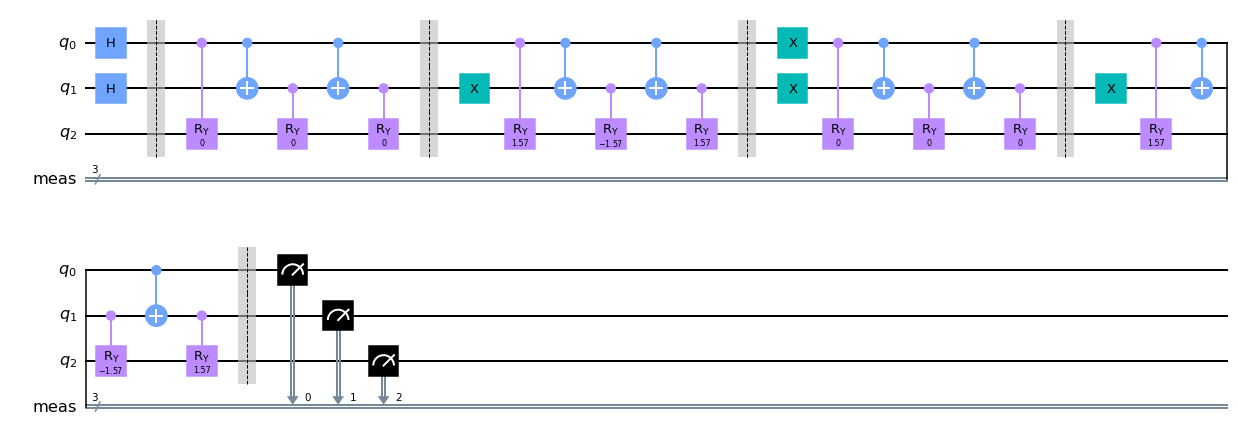

In [9]:
pi = 3.14
theta1 = 0
theta2 = pi/2 # all pixels black
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta1,0,2)
qc.cx(0,1)
qc.cry(-theta1,1,2)
qc.cx(0,1)
qc.cry(theta1,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta2,0,2)
qc.cx(0,1)
qc.cry(-theta2,1,2)
qc.cx(0,1)
qc.cry(theta2,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta1,0,2)
qc.cx(0,1)
qc.cry(-theta1,1,2)
qc.cx(0,1)
qc.cry(theta1,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta2,0,2)
qc.cx(0,1)
qc.cry(-theta2,1,2)
qc.cx(0,1)
qc.cry(theta2,1,2)

qc.measure_all()

qc.draw()

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


{'001': 1048, '111': 1019, '110': 1006, '000': 1023}


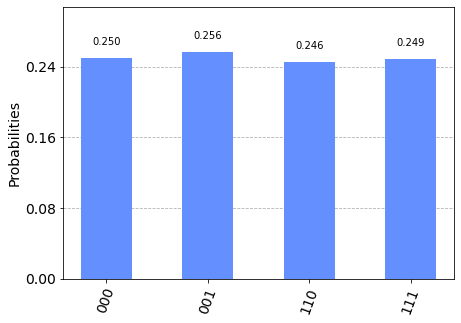

In [15]:
for backend in Aer.backends():
 print(backend)
from qiskit import assemble
qc.save_statevector()
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)